### 数据描述

LC.csv数据集-LC (Loan Characteristics) 表为标的特征表，每支标一条记录。共有21个字段，包括一个主键（listingid）、7个标的特征和13个成交当时的借款人信息，全部为成交当时可以获得的信息。

信息的维度比较广，大致可以分为基本信息，认证信息，信用信息，借款信息。

基本信息：年龄、性别；

认证信息：手机认证、户口认证、视频认证、征信认证、淘宝认证；

信用信息：初始评级、历史正常还款期数、历史逾期还款期数；

借款信息：历史成功借款金额、历史成功借款次数、借款金额、借款期限、借款成功日期

In [9]:
import numpy
import pandas
import matplotlib.pyplot
file_LC='data_paipai/LC.csv'
LC=pandas.read_csv(file_LC)
LC.head()

,ListingId,借款金额,借款期限,借款利率,借款成功日期,初始评级,借款类型,是否首标,年龄,性别,...,户口认证,视频认证,学历认证,征信认证,淘宝认证,历史成功借款次数,历史成功借款金额,总待还本金,历史正常还款期数,历史逾期还款期数
0,126541,18000,12,18.0,2015-05-04,C,其他,否,35,男,...,未成功认证,成功认证,未成功认证,未成功认证,未成功认证,11,40326.0,8712.73,57,16
1,133291,9453,12,20.0,2015-03-16,D,其他,否,34,男,...,成功认证,未成功认证,未成功认证,未成功认证,未成功认证,4,14500.0,7890.64,13,1
2,142421,27000,24,20.0,2016-04-26,E,普通,否,41,男,...,未成功认证,未成功认证,未成功认证,未成功认证,未成功认证,5,21894.0,11726.32,25,3
3,149711,25000,12,18.0,2015-03-30,C,其他,否,34,男,...,成功认证,成功认证,未成功认证,未成功认证,未成功认证,6,36190.0,9703.41,41,1
4,152141,20000,6,16.0,2015-01-22,C,电商,否,24,男,...,成功认证,成功认证,未成功认证,未成功认证,未成功认证,13,77945.0,0.00,118,14


In [10]:
file_LP='data_paipai/LP.csv'
LP=pandas.read_csv(file_LP)
LP.head()

,ListingId,期数,还款状态,应还本金,应还利息,剩余本金,剩余利息,到期日期,还款日期,recorddate
0,126541,1,1,1380.23,270.00,0.0,0.0,2015-06-04,2015-06-04,2017-02-22
1,126541,2,1,1400.94,249.29,0.0,0.0,2015-07-04,2015-07-04,2017-02-22
2,126541,3,1,1421.95,228.28,0.0,0.0,2015-08-04,2015-08-04,2017-02-22
3,126541,4,1,1443.28,206.95,0.0,0.0,2015-09-04,2015-09-04,2017-02-22
4,126541,5,1,1464.93,185.30,0.0,0.0,2015-10-04,2015-10-04,2017-02-22


In [11]:
LC.info()
LC.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328553 entries, 0 to 328552
Data columns (total 21 columns):
ListingId    328553 non-null int64
借款金额         328553 non-null int64
借款期限         328553 non-null int64
借款利率         328553 non-null float64
借款成功日期       328553 non-null object
初始评级         328553 non-null object
借款类型         328553 non-null object
是否首标         328553 non-null object
年龄           328553 non-null int64
性别           328553 non-null object
手机认证         328553 non-null object
户口认证         328553 non-null object
视频认证         328553 non-null object
学历认证         328553 non-null object
征信认证         328553 non-null object
淘宝认证         328553 non-null object
历史成功借款次数     328553 non-null int64
历史成功借款金额     328553 non-null float64
总待还本金        328553 non-null float64
历史正常还款期数     328553 non-null int64
历史逾期还款期数     328553 non-null int64
dtypes: float64(3), int64(7), object(11)
memory usage: 52.6+ MB


,ListingId,借款金额,借款期限,借款利率,年龄,历史成功借款次数,历史成功借款金额,总待还本金,历史正常还款期数,历史逾期还款期数
count,3.285530e+05,328553.000000,328553.000000,328553.000000,328553.000000,328553.000000,3.285530e+05,3.285530e+05,328553.000000,328553.000000
mean,1.907948e+07,4423.816906,10.213594,20.601439,29.143042,2.323159,8.785857e+03,3.721665e+03,9.947658,0.423250
std,8.375769e+06,11219.664024,2.780444,1.772408,6.624286,2.922361,3.502736e+04,8.626061e+03,14.839899,1.595681
min,1.265410e+05,100.000000,1.000000,6.500000,17.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.190887e+07,2033.000000,6.000000,20.000000,24.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,1.952325e+07,3397.000000,12.000000,20.000000,28.000000,2.000000,5.000000e+03,2.542410e+03,5.000000,0.000000
75%,2.629862e+07,5230.000000,12.000000,22.000000,33.000000,3.000000,1.035500e+04,5.446810e+03,13.000000,0.000000
max,3.281953e+07,500000.000000,24.000000,24.000000,56.000000,649.000000,7.405926e+06,1.172653e+06,2507.000000,60.000000


观察一下年龄分布，最小17岁，最大56岁，平均年龄29岁，33岁以下的占比超过了75%。说明用户整体还是中青年。
将年龄分为'15-20', '20-25', '25-30', '30-35', '35-40', '40+'比较合理
观察一下借款金额分布，最小借款金额为100元，最大为50万元，平均值为4424元，低于5230的借款金额占到了75%。
说明应该是小额借款比较多。将借款金额分为0-2000，2000-3000，3000-4000，4000-5000，5000-6000，6000以上比较合理

In [12]:
LC['ListingId'].value_counts()
LP.info()
LP.describe()
LP = LP.dropna(how='any')
LP.info()
LC = LC.dropna(how='any')
# 数据很干净

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203276 entries, 0 to 3203275
Data columns (total 10 columns):
ListingId     int64
期数            int64
还款状态          int64
应还本金          float64
应还利息          float64
剩余本金          float64
剩余利息          float64
到期日期          object
还款日期          object
recorddate    object
dtypes: float64(4), int64(3), object(3)
memory usage: 244.4+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3203276 entries, 0 to 3203275
Data columns (total 10 columns):
ListingId     int64
期数            int64
还款状态          int64
应还本金          float64
应还利息          float64
剩余本金          float64
剩余利息          float64
到期日期          object
还款日期          object
recorddate    object
dtypes: float64(4), int64(3), object(3)
memory usage: 268.8+ MB


## 分析用户画像（性别、学历、年龄、是否首标）

([<matplotlib.patches.Wedge at 0x1e049bf8710>,
 [Text(-0.6152268248749628, 0.9118639997029557, '男'),
  Text(0.6152269102498288, -0.9118639421012597, '女')],
 [Text(-0.335578268113616, 0.49738036347433945, '68.9%'),
  Text(0.3355783146817247, -0.49738033205523247, '31.1%')])

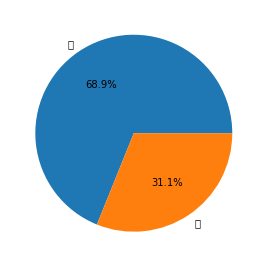

In [13]:
#性别分析
#coding: UTF-8
male = LC[LC['性别'] == '男']
female = LC[LC['性别'] == '女']
sex = (male,female)
sex_data = (male['借款金额'].sum(), female['借款金额'].sum())
sex_idx = ('男', '女')
matplotlib.pyplot.figure(figsize=(15, 6))
matplotlib.pyplot.subplot(1,3,1)
matplotlib.pyplot.pie(sex_data, labels=sex_idx, autopct='%.1f%%')

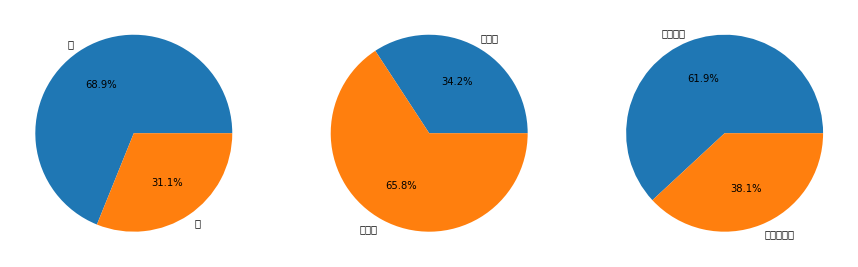

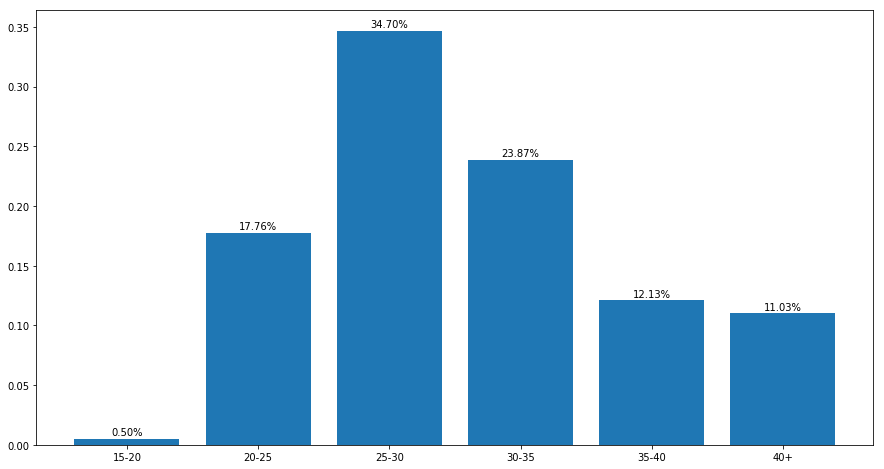

In [14]:
#性别分析
male = LC[LC['性别'] == '男']
female = LC[LC['性别'] == '女']
sex = (male,female)
sex_data = (male['借款金额'].sum(), female['借款金额'].sum())
sex_idx = ('男', '女')
matplotlib.pyplot.figure(figsize=(15, 6))
matplotlib.pyplot.subplot(1,3,1)
matplotlib.pyplot.pie(sex_data, labels=sex_idx, autopct='%.1f%%')

#新老客户分析
new = LC[LC['是否首标'] == '是']
old = LC[LC['是否首标'] == '否']
newold_data = (new['借款金额'].sum(), old['借款金额'].sum())
newold_idx = ('新客户', '老客户')
matplotlib.pyplot.subplot(1,3,2)
matplotlib.pyplot.pie(newold_data, labels=newold_idx, autopct='%.1f%%')

#学历分析
ungraduate = LC[LC['学历认证'] == '未成功认证']
graduate = LC[LC['学历认证'] == '成功认证']
education_data = (ungraduate['借款金额'].sum(), graduate['借款金额'].sum())
education_idx = ('大专以下', '大专及以上')
matplotlib.pyplot.subplot(1,3,3)
matplotlib.pyplot.pie(education_data, labels=education_idx, autopct='%.1f%%')
matplotlib.pyplot.show()

#年龄分析
ageA = LC.loc[(LC['年龄'] >= 15) & (LC['年龄'] < 20)]
ageB = LC.loc[(LC['年龄'] >= 20) & (LC['年龄'] < 25)]
ageC = LC.loc[(LC['年龄'] >= 25) & (LC['年龄'] < 30)]
ageD = LC.loc[(LC['年龄'] >= 30) & (LC['年龄'] < 35)]
ageE = LC.loc[(LC['年龄'] >= 35) & (LC['年龄'] < 40)]
ageF = LC.loc[LC['年龄'] >= 40]
age = (ageA, ageB, ageC, ageD, ageE, ageF)
age_total = 0
age_percent =[]
for i in age:
    tmp = i['借款金额'].sum()
    age_percent.append(tmp)
    age_total  += tmp
age_percent /= age_total
age_idx = ['15-20', '20-25', '25-30', '30-35', '35-40', '40+']
matplotlib.pyplot.figure(figsize=(15, 8))
matplotlib.pyplot.bar(age_idx, age_percent)
for (a, b) in zip(age_idx, age_percent):
    matplotlib.pyplot.text(a, b+0.001, '%.2f%%' % (b * 100), ha='center', va='bottom', fontsize=10)
matplotlib.pyplot.show()


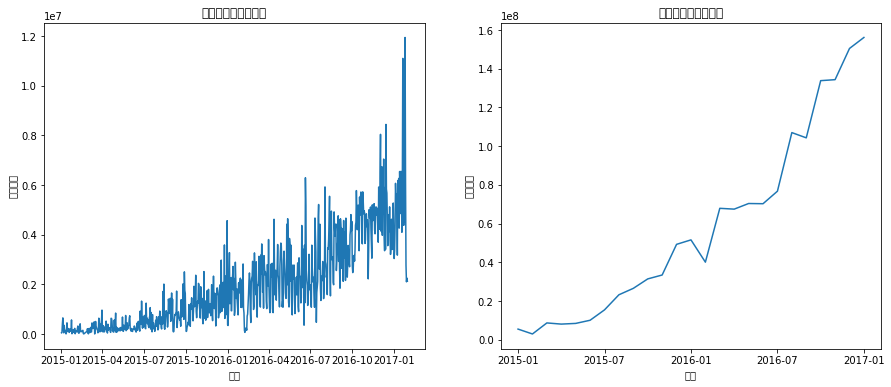

每日的借款金额 5204663.8 
 标准差 2203394.1435809094


In [15]:
from datetime import datetime

#分析每日贷款金额的走势
loan = LC[['借款成功日期', '借款金额']].copy()
loan['借款日期'] = pandas.to_datetime(loan['借款成功日期'])
loan1 = loan.pivot_table(index='借款日期', aggfunc='sum').copy()
matplotlib.pyplot.figure(figsize=(15, 6))
matplotlib.pyplot.subplot(1,2,1)
matplotlib.pyplot.plot(loan1)
matplotlib.pyplot.xlabel('日期')
matplotlib.pyplot.ylabel('借款金额')
matplotlib.pyplot.title('每天贷款金额波动图')

#分析每月贷款金额的走势
loan['借款成功月份'] = [datetime.strftime(x, '%Y-%m') for x in loan['借款日期']]
loan2 = loan.pivot_table(index='借款成功月份', aggfunc='sum').copy()
matplotlib.pyplot.subplot(1,2,2)
matplotlib.pyplot.plot(loan2)
matplotlib.pyplot.xlabel('月份')
matplotlib.pyplot.xticks(['2015-01','2015-07','2016-01','2016-07','2017-01'])
matplotlib.pyplot.ylabel('借款金额')
matplotlib.pyplot.title('每月贷款金额波动图')
matplotlib.pyplot.show()

# 对2017年1月的数据继续进行分析，并求出平均值和标准差
loan3 = loan1.loc['2017-01']
avg = loan3['借款金额'].mean()
std = loan3['借款金额'].std()
print('每日的借款金额',avg,'\n','标准差',std)

结论：

1.每日贷款金额呈现的是一个往上的趋势,但是每天的波动较大。

2.每月贷款分析结论：从2015年1月到2017年1月，月度贷款金额呈现上升趋势，上升速度随着时间增快。

3.2017年1月每日的借款金额达到5204664元，标准差为2203394，根据3σ原则，想使每日借款金额充足的概率达到99.9%，则每日公式账上需准备5204664+2203394×3=11814846元。

3.分析逾期还款率（借款人的初始评级、借款类型、性别、年龄、借款金额等特征）

逾期还款率 = 历史逾期还款期数/（历史逾期还款期数+历史正常还款期数）

## 分析逾期还款率（借款人的初始评级、借款类型、性别、年龄、借款金额等特征）

In [23]:
# 初始评级的数据划分
level_idx = ('A', 'B', 'C', 'D', 'E', 'F')
lev = []
for i in level_idx:
    temp = LC[LC['初始评级'] == i]
    lev.append(temp)
    print('lev is',lev[:10])

0  2017-01-29    E   其他    否  25  男  ...   
327571   32753441   2000    12  22.0  2017-01-30    E   其他    否  24  女  ...   
327578   32754091   2901    12  22.0  2017-01-30    E   其他    否  27  男  ...   
327582   32754631   3300    12  22.0  2017-01-30    E   其他    否  28  男  ...   
327583   32754871   3839    12  22.0  2017-01-29    E   其他    否  32  男  ...   
327747   32763121   2190    12  22.0  2017-01-30    E   普通    否  28  男  ...   
328079   32788161   2299    12  22.0  2017-01-30    E   普通    否  34  男  ...   
328406   32807781   2000    12  22.0  2017-01-30    E   其他    否  27  男  ...   

         学历认证   征信认证   淘宝认证 历史成功借款次数 历史成功借款金额     总待还本金  历史正常还款期数  历史逾期还款期数  \
2       未成功认证  未成功认证  未成功认证        5  21894.0  11726.32        25         3   
6       未成功认证  未成功认证  未成功认证       15  63989.0   6619.37        75         8   
10      未成功认证  未成功认证  未成功认证       12  71701.0   8109.78        82         0   
11      未成功认证  未成功认证  未成功认证       12  79566.0      0.00        82         0   
12     

In [24]:
# 借款类型的数据划分
kind_idx = ('电商', 'APP闪电', '普通', '其他')
kind = []
for i in kind_idx:
    temp = LC[LC['借款类型'] == i]
    kind.append(temp)
    print('kind is',kind[:10])

5000    12  22.0  2017-01-30    D   普通    否  41  男  ...   
328516   32816401   3548    12  20.0  2017-01-30    D   普通    否  38  男  ...   
328524   32817221   5100    12  20.0  2017-01-30    B   普通    否  24  男  ...   
328526   32817361   7354    12  20.0  2017-01-30    C   普通    否  25  男  ...   
328530   32817701   1041    12  20.0  2017-01-30    C   普通    否  24  男  ...   
328533   32817951   2000    12  20.0  2017-01-30    C   普通    否  26  女  ...   
328537   32818161   2873     6  16.0  2017-01-30    C   普通    否  28  男  ...   

         学历认证   征信认证   淘宝认证 历史成功借款次数 历史成功借款金额     总待还本金  历史正常还款期数  历史逾期还款期数  \
2       未成功认证  未成功认证  未成功认证        5  21894.0  11726.32        25         3   
5       未成功认证  未成功认证  未成功认证        7  35622.0      0.00        56         0   
7       未成功认证  未成功认证  未成功认证        7  35000.0   4078.61        52         0   
10      未成功认证  未成功认证  未成功认证       12  71701.0   8109.78        82         0   
11      未成功认证  未成功认证  未成功认证       12  79566.0      0.00        82      

In [27]:
# 不同借款金额的数据划分
amount_idx = ('0-2000', '2000-3000', '3000-4000', '4000-5000', '5000-6000', '6000+')
amountA = LC.loc[(LC['借款金额'] > 0) & (LC['借款金额'] < 2000)]
amountB = LC.loc[(LC['借款金额'] >= 2000) & (LC['借款金额'] < 3000)]
amountC = LC.loc[(LC['借款金额'] >= 3000) & (LC['借款金额'] < 4000)]
amountD = LC.loc[(LC['借款金额'] >= 4000) & (LC['借款金额'] < 5000)]
amountE = LC.loc[(LC['借款金额'] >= 5000) & (LC['借款金额'] < 6000)]
amountF = LC.loc[(LC['借款金额'] >= 6000)]
amount = (amountA, amountB, amountC, amountD, amountE, amountF)

# LC['Yuqi_huankuan_lv'] = LC['历史逾期还款期数'] / (LC['历史逾期还款期数'] + LC['历史正常还款期数']) * 100
LC['逾期还款率'] = LC['历史逾期还款期数'] / (LC['历史逾期还款期数'] + LC['历史正常还款期数']) * 100


# 逾期还款率的分析图
def depayplot(i, idx, data, xlabel, title, index):
    depay = []
    for a in data:
        tmp = a[index].mean()
        depay.append(tmp)
    matplotlib.pyplot.subplot(2, 3, i)
    matplotlib.pyplot.bar(idx, depay)
    for (a, b) in zip(idx, depay):
        matplotlib.pyplot.text(a, b + 0.001, '%.2f%%' % b, ha='center', va='bottom', fontsize=10)
    matplotlib.pyplot.xlabel(xlabel)
    matplotlib.pyplot.ylabel(index)
    matplotlib.pyplot.title(title)


matplotlib.pyplot.figure(figsize=(15, 10))
# index = 'Yuqi_huankuan_lv'
index = '逾期还款率'

# 根据初始评级对逾期还款率进行分析
depayplot(1, level_idx, lev, '初始评级', '不同初始评级客户逾期还款率', index)

# 根据年龄对逾期还款率进行分析
depayplot(2, age_idx, age, '年龄', '不同年龄客户逾期还款率', index)

# 根据借款类型对逾期还款率进行分析
depayplot(3, kind_idx, kind, '借款类型', '不同借款类型客户逾期还款率', index)

# 根据性别对逾期还款率进行分析
depayplot(4, sex_idx, sex, '性别', '不同性别客户逾期还款率', index)

# 根据借款金额对逾期还款率进行分析
depayplot(5, amount_idx, amount, '借款金额', '不同借款金额客户逾期还款率', index)

matplotlib.pyplot.show()

KeyError: '逾期还款率'